In [1]:
import torch
from unet import Unet
from dataset import RoadDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [2]:
# Model setup
model = Unet(input_channel=3,class_num=2)

# Dataset setup
data_path='/ediss_data/ediss6/deepglobe-road-extraction-dataset'
dataset_train = RoadDataset(data_path, "train")
dataset_test = RoadDataset(data_path, "test")
loader_test = DataLoader(dataset_test, batch_size=1)


In [3]:
checkpoint = torch.load("checkpoints/best_model.pt")
model.load_state_dict(checkpoint)

/tmp/ipykernel_1507911/3064791385.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoints/best_model.pt")


<All keys matched successfully>

In [4]:
img,mask = next(iter(loader_test))
logits= model(img)
pred_prob = torch.nn.Softmax(dim=1)(logits)

pred_mask = torch.argmax(pred_prob, dim=1)  # Get class predictions
(pred_mask>0).any()


tensor(True)

In [10]:
pred_mask.max()

tensor(0)

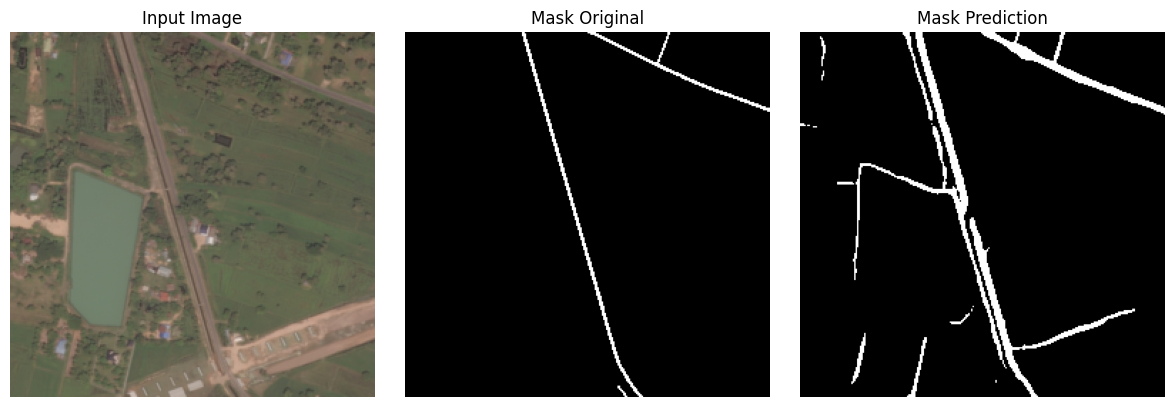

In [6]:
import matplotlib.pyplot as plt
import torch

def plot_image_and_masks(image: torch.Tensor, mask1: torch.Tensor, mask2: torch.Tensor):
    """
    Plot an image and two masks side by side.
    
    Args:
        image (torch.Tensor): The input image tensor of shape [1, C, H, W].
        mask1 (torch.Tensor): The first mask tensor of shape [1, 1, H, W] or [1, H, W].
        mask2 (torch.Tensor): The second mask tensor of shape [1, 1, H, W] or [1, H, W].
    """
    # Remove the batch dimension
    image = image.squeeze(0)  # [C, H, W]
    mask1 = mask1.squeeze()  # [H, W]
    mask2 = mask2.squeeze(0)  # [H, W]

    # Permute image dimensions for plotting
    image = image.permute(1, 2, 0)  # [H, W, C]

    # Plot the image and masks
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(1, 3, 1)
    plt.imshow(image.cpu().numpy())
    plt.title("Input Image")
    plt.axis("off")

    # Plot the first mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask1.cpu().numpy(), cmap="gray")
    plt.title("Mask Original")
    plt.axis("off")

    # Plot the second mask
    plt.subplot(1, 3, 3)
    plt.imshow(mask2.cpu().numpy(), cmap="gray")
    plt.title("Mask Prediction")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming img, mask1, mask2 are tensors from your DataLoader with shapes [1, C, H, W] and [1, 1, H, W]
plot_image_and_masks(img, mask, pred_mask)
